In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [47]:
dataset = np.load('../dataset/files/dataset.npz')
X = dataset['X']
Y = dataset['Y']
t = dataset['t']
param_names = dataset['param_names']

### Basic Statistics

In [48]:
df = pd.DataFrame(columns=['Parameter', 'Mean', 'Std', 'Min', 'Max'])

for index, item in enumerate(param_names):
    mean = np.mean(X[:, index])
    std = np.std(X[:, index])
    min = np.min(X[:, index])
    max = np.max(X[:, index])
    
    df.loc[index] = [item, mean, std, min, max]
    

### Histogram of Parameters (X)
#### Objetive: Verify that sampled parameters follow the intended distributions and cover the full expected ranges

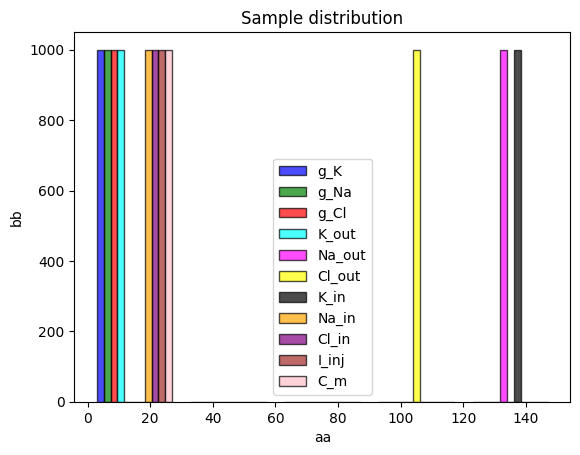

In [49]:
colors = ['blue','green','red','cyan','magenta','yellow','black','orange','purple','brown','pink']

plt.hist([X[:, index] for index, _ in enumerate(param_names)], bins=5,
        color=colors, label=param_names, edgecolor='black', alpha=0.7)
plt.title("Sample distribution")
plt.xlabel("aa")
plt.ylabel("bb")
plt.legend()
plt.show()

### Boxplots of Parameters (X)
#### Objective: Summarize parameter variability (median, quartiles, outliers)

/var/folders/t9/kfjfhkzx06n2nhmhz280v41c0000gn/T/ipykernel_67761/1184953743.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X[:, index] for index, _ in enumerate(param_names)], labels=param_names)


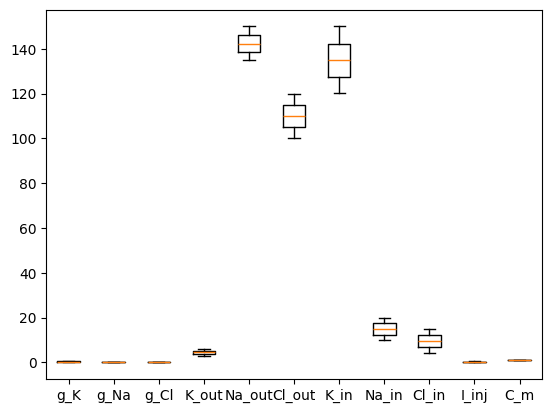

In [53]:
plt.boxplot([X[:, index] for index, _ in enumerate(param_names)], labels=param_names)
plt.show()

### Sample Voltage Traces
#### Objective: Visualize a small set of individual membrane potential trajectories to assess variability across simulations

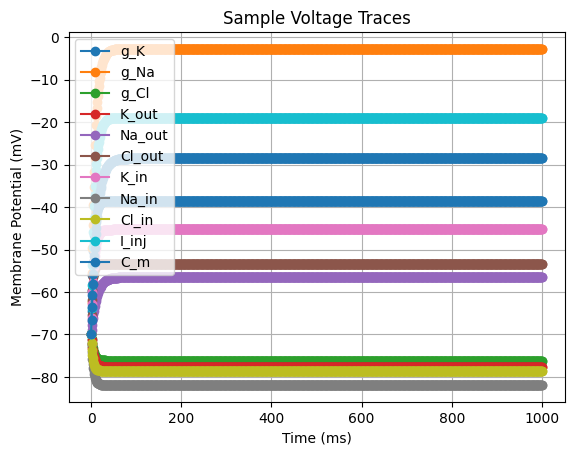

In [55]:
for index, name in enumerate(param_names):
    plt.plot(Y[index, :], marker='o', label=name)

plt.title("Sample Voltage Traces")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)
plt.show()

## Mean Membrane Potential with Confidence Interval
### Objective: Show the average trend of membrane potential over time and the variability across all samples

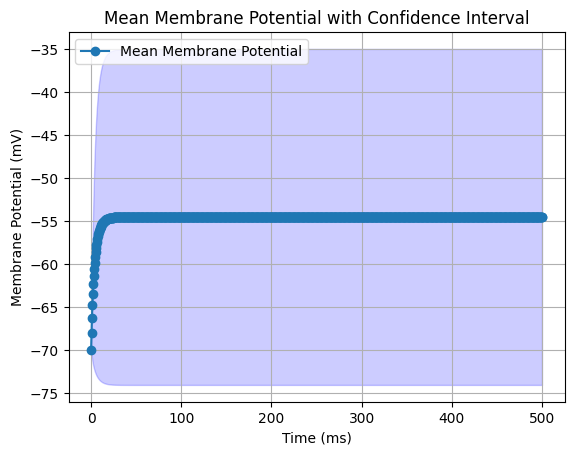

In [59]:
mean_V = np.mean(Y, axis=0)
std_V = np.std(Y, axis=0)

plt.plot(t, mean_V, marker='o', label='Mean Membrane Potential')
plt.fill_between(t, mean_V - std_V, mean_V + std_V, color='blue', alpha=0.2)

plt.title("Mean Membrane Potential with Confidence Interval")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)
plt.show()

## Membrane Potential Distribution at Selected Time Points
### Objective: Examine the variability and shape of the distribution of V(t) at specific times during the simulation

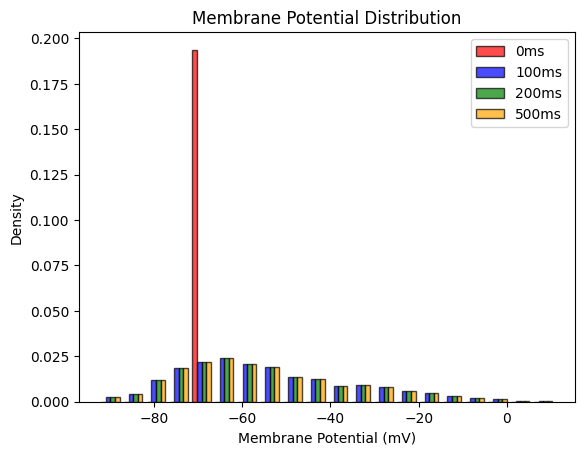

In [62]:
t_points = [0, 100, 200, 500]
t_indexes = [np.searchsorted(t, tp) for tp in t_points]

plt.hist([Y[:, i] for i in t_indexes], bins=20,
        color=['red', 'blue', 'green', 'orange'], label=['0ms', '100ms', '200ms', '500ms'],
        edgecolor='black', alpha=0.7, density=True)
plt.title("Membrane Potential Distribution")
plt.xlabel("Membrane Potential (mV)")
plt.ylabel("Density")
plt.legend()
plt.show()

## Heatmap of Membrane Potential Trajectories Across Samples
### Objective: visualize how membrane potential evolves over time across all samples

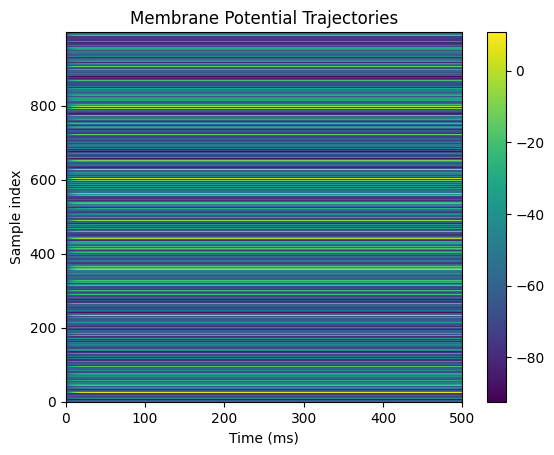

In [64]:
plt.imshow(Y, cmap='viridis', interpolation='nearest', aspect='auto',
           extent=[t[0], t[-1], 0, Y.shape[0]-1])
plt.colorbar()
plt.title("Membrane Potential Trajectories")
plt.xlabel("Time (ms)")
plt.ylabel("Sample index")
plt.show()

## Boxplots of Membrane Potential at Selected Time Points
### Summarize the distribution of membrane potential at specific times in the simulation

/var/folders/t9/kfjfhkzx06n2nhmhz280v41c0000gn/T/ipykernel_67761/2771289069.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([Y[:, index] for index in t_indexes], labels=['0ms', '100ms', '200ms', '500ms'])


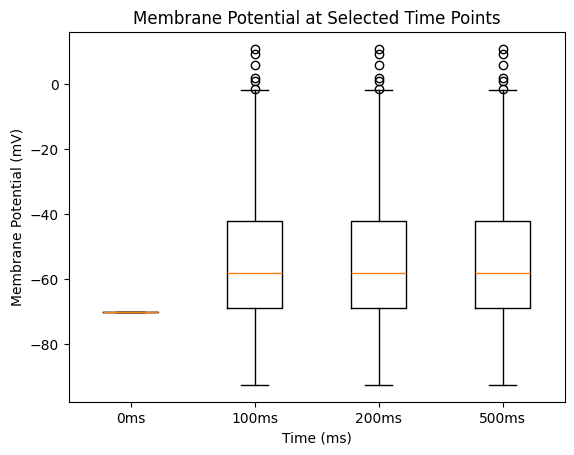

In [66]:
t_points = [0, 100, 200, 500]
t_indexes = [np.searchsorted(t, tp) for tp in t_points]

plt.boxplot([Y[:, index] for index in t_indexes], labels=['0ms', '100ms', '200ms', '500ms'])
plt.title("Membrane Potential at Selected Time Points")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.show()